In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

LOAD THE DATASET

In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


DATA PREPROCESSING

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df = df.drop(["RowNumber","CustomerId","Surname"], axis =1)

In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [ ]:
# Define features (X) and target variable (y)

X = df.drop('Exited', axis=1)  # Features
y = df['Exited']  # Target variable

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [ ]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 1 )

In [ ]:
# Standardize the features

scaler = StandardScaler()

In [ ]:
scaler

StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Exploratory Data Analysis (EDA)

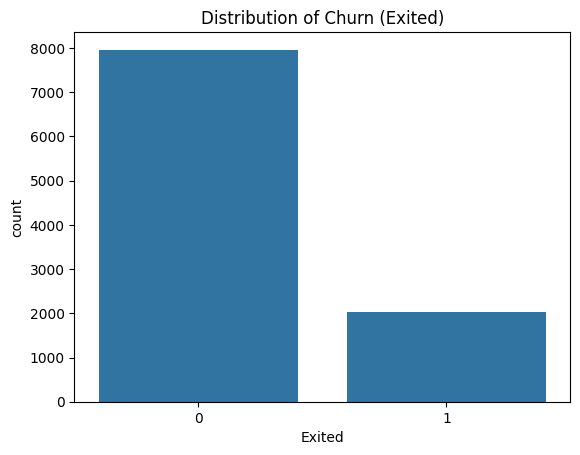

In [ ]:
# Plot distribution of the target variable

sns.countplot(x ='Exited', data = df)
plt.title('Distribution of Churn (Exited)')
plt.show()

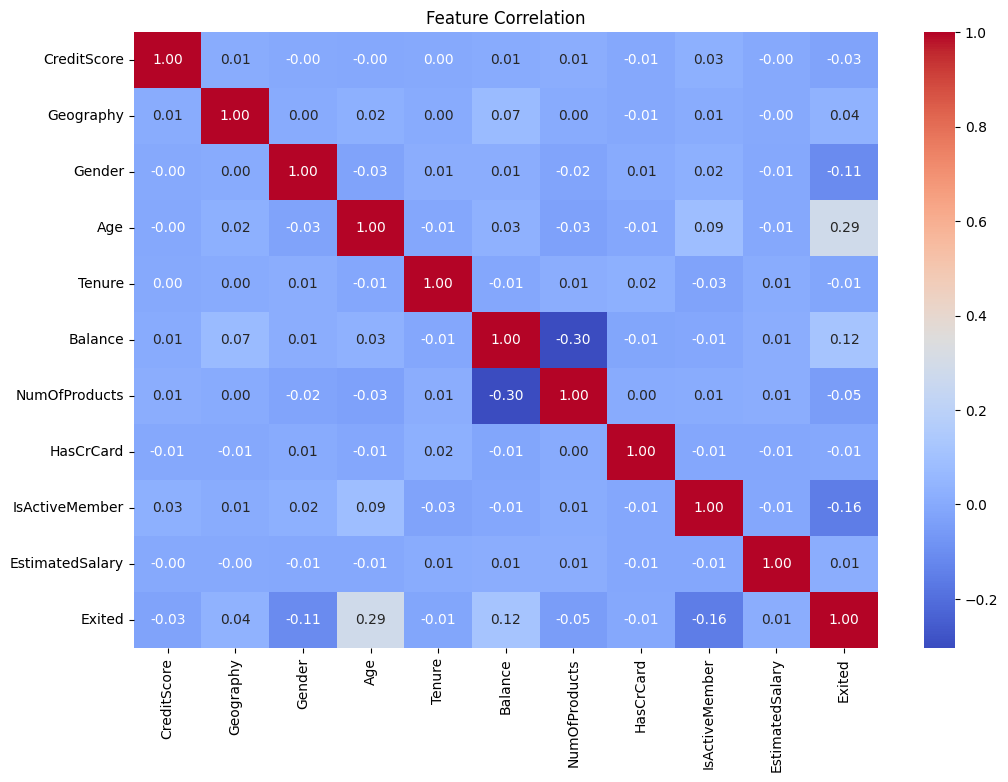

In [ ]:
# Correlation heatmap

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Logistic Regression model

lr_model = LogisticRegression(random_state = 1)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [ ]:
# Predictions

y_pred_lr = lr_model.predict(X_test)

In [ ]:
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Evaluation

print("Logistic Regression Accuracy", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix \n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report \n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy 0.806
Confusion Matrix 
 [[1536   49]
 [ 339   76]]
Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1585
           1       0.61      0.18      0.28       415

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.58      2000
weighted avg       0.78      0.81      0.76      2000



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Random Forest model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions

y_pred_rf = rf_model.predict(X_test)

In [ ]:
y_pred_rf

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
# Evaluation

print("Random Forest Accuracy", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix \n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report \n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy 0.862
Confusion Matrix 
 [[1543   42]
 [ 234  181]]
Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1585
           1       0.81      0.44      0.57       415

    accuracy                           0.86      2000
   macro avg       0.84      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000



Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Gradient Boosting model

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Predictions

y_pred_gb = gb_model.predict(X_test)

In [ ]:
y_pred_gb

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Evaluation

print("Gradient Boosting Accuracy", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix \n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report \n", classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy 0.864
Confusion Matrix 
 [[1538   47]
 [ 225  190]]
Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1585
           1       0.80      0.46      0.58       415

    accuracy                           0.86      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000

